In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stock_data = pd.read_csv("PTT.csv")

In [7]:
# reverse order in rows
stock_data = stock_data.sort_index(ascending=False)
stock_data.to_csv(r'C:\Users\59010602\Project4D\PTT.csv', index = None, header=True)
stock_data = pd.read_csv("PTT.csv")

In [8]:
stock_data.head()

,Date,Symbol,Open,High,Low,Last,ChangePercent,Volumn,Money,Net5D,Net13D,Net34D,SMA5,SMA12,SMA26,MACD,MACD5,Vol5,RSI,RSI5
0,8/14/2019,PTT,43.50,44.00,43.0,43.25,0.58,88987125,3885774760,16991975860,3.467048e+10,7.677470e+10,43.95,45.500000,46.798077,-1.381410,-1.075249,77083850.8,7.142857,1.428571
1,8/13/2019,PTT,44.00,44.25,42.5,43.00,-2.82,101448610,4393666130,16055545200,3.248500e+10,7.788026e+10,44.40,45.875000,46.990385,-1.262108,-0.938782,72251810.2,0.000000,1.428571
2,8/9/2019,PTT,44.25,44.75,44.0,44.25,0.00,41819380,1855925260,14225487290,2.909885e+10,7.848408e+10,44.95,46.270833,47.192308,-1.014423,-0.813604,63110790.8,0.000000,2.857143
3,8/8/2019,PTT,45.00,45.25,44.0,44.25,-1.67,89159527,3961249810,17439902480,2.890182e+10,8.125306e+10,45.30,46.562500,47.355769,-0.918981,-0.723611,76687750.8,0.000000,4.285714
4,8/7/2019,PTT,45.50,45.75,45.0,45.00,-1.10,64004612,2895359900,14735595230,2.649837e+10,7.934528e+10,45.90,46.854167,47.557692,-0.799323,-0.629452,64197068.8,0.000000,5.714286


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 20 columns):
Date             1099 non-null object
Symbol           1099 non-null object
Open             1099 non-null float64
High             1099 non-null float64
Low              1099 non-null float64
Last             1099 non-null float64
ChangePercent    1099 non-null float64
Volumn           1099 non-null int64
Money            1099 non-null int64
Net5D            1099 non-null int64
Net13D           1099 non-null float64
Net34D           1099 non-null float64
SMA5             1099 non-null float64
SMA12            1088 non-null float64
SMA26            1074 non-null float64
MACD             1074 non-null float64
MACD5            1074 non-null float64
Vol5             1099 non-null float64
RSI              1086 non-null float64
RSI5             1086 non-null float64
dtypes: float64(15), int64(3), object(2)
memory usage: 171.8+ KB


In [23]:
input_feature= stock_data.loc[4:len(stock_data),['Volumn', 'SMA5']]
input_feature.head(10)

,Volumn,SMA5
4,64004612,45.90
5,64826922,46.35
6,55743513,46.70
7,109704180,47.00
8,26706117,47.35
9,36834756,47.45
10,23792095,47.55
11,42571980,47.65
12,20088967,47.75
13,35688017,47.75


In [24]:
input_feature.shape

(1095, 2)

In [25]:
input_feature = input_feature.values
input_data = input_feature

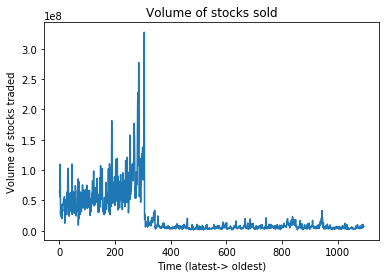

In [26]:
plt.plot(input_feature[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

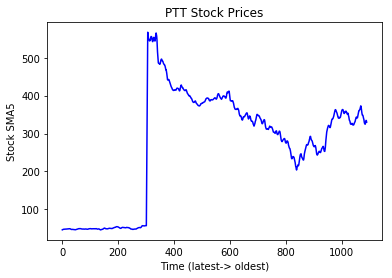

In [27]:
plt.plot(input_feature[:,1], color='blue')
plt.title("PTT Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock SMA5")
plt.show()

In [28]:
# Normalizing the input data using MinMaxScaler so that all the input features are on the scale from 0 to 1

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
input_data[:,:] = sc.fit_transform(input_feature[:,:])

In [29]:
# For each day we go back 50 business days in the past and add the volume of the stocks traded an average stock price.

lookback = 50

test_size = int(.3 * (len(stock_data)-26))
X = []
y = []
for i in range((len(stock_data)-26) - lookback - 1):
    t = []
    for j in range(0, lookback):
        t.append(input_data[[(i + j)], :])
    X.append(t)
    y.append(input_data[i + lookback, 1])

In [30]:
X, y = np.array(X), np.array(y)
X_test = X[:test_size + lookback]
X = X.reshape(X.shape[0], lookback, 2)
X_test = X_test.reshape(X_test.shape[0], lookback, 2)
print(X.shape)
print(X_test.shape)

(1022, 50, 2)
(371, 50, 2)


In [31]:
from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X, y, epochs=20, batch_size=32)

W0831 17:14:12.104109 10308 deprecation.py:323] From C:\Users\59010602\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0831 17:14:14.055075 10308 deprecation_wrapper.py:119] From C:\Users\59010602\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0831 17:14:14.325097 10308 deprecation_wrapper.py:119] From C:\Users\59010602\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/20
1022/1022 [==============================] - 6s 6ms/step - loss: 0.0615
Epoch 2/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0097
Epoch 3/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0068
Epoch 4/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0055A: 1s
Epoch 5/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0045
Epoch 6/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 7/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0035
Epoch 8/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0031
Epoch 9/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0029A: 1s -
Epoch 10/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0030
Epoch 11/20
1022/1022 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 12/20
1022/1022 [==============================] - 3s 3ms/step - lo

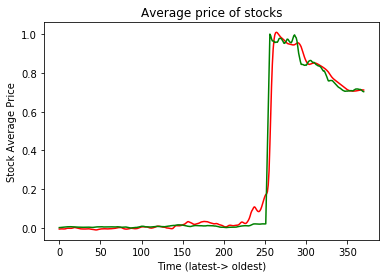

In [33]:
predicted_value = model.predict(X_test)

plt.plot(predicted_value, color='red')
plt.plot(input_data[lookback:test_size + (2 * lookback), 1], color='green')
plt.title("Average price of stocks")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Average Price")
plt.show()